<a href="https://colab.research.google.com/github/alee-ds-star/de/blob/academic/Academic%20Work/Practical%20Machine%20Learning/Deep%20Learning%20for%20Computer%20Vision/Language_Modeling_RNN_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Appendix/Code:**

## **Language Modeling Using Recurrent Neural Networks (RNN):** 
*  In this experiment, a document collection on movie reviews was used in complement with pretrained word vectors from Twitter. Data from the document collection contained over 200,000 words. Pretrained word vectors represented 1,193,515 words. 
* Multiple recurrent neural networks were built and tested to classify negative and positive reviews in the dataset. Train and test set accuracies and losses were captured, as well as processing times for training each model. The number of layers and nodes per layer served as key parameters that differentiated each model, and the accuracies, loss, and processing times were be compared. Validation accuracy was the main metric used to compare models. 
* The document collection was a part of 2 folders, one for positive reviews and the other for negative. Each folder contained 500 reviews.
* Pretrained word embeddings were applied to the document collection where words were replaced with a vector of numbers.
* Training and test sets were created based off an 80/20 split. Word vectors for negative and positive reviews were randomly shuffled.
* For each document/word vector in the test set, a negative or positive review was predicted. Prediction classes were 0 for negative, and 1 for positive.
*  Language models were developed using recurrent neural network layers to predict the outcome of each review.
*   The goal of this benchmark experiment was to assess the effectiveness of recurrent neural networks using different topologies. 
*   Benchmark experiment was based on a 2x2 factorial design with two levels on each of two experimental factors. 

## **What is Recurrent Neural Network (RNN)?**
Recurrent Neural Networks, or RNNs, are deep learning algorithms that are inspired by our brain's capability of processing language and anticipating events through memory. This variant neural network is a class of nets that can predict future outcomes. They can analyze time series data such as in stock prices, and can give you recommendations on when to buy or sell. For self-driving vehicles, they can anticipate car trajectories and help to avoid accidents. They can also process sequences of an arbitrary size, where they can take sentences, documents, or audio recordings as input, and make them useful for natural language processing (NLP) systems (e.g. speech-to-text). A recurrent neural network is very similar to a feedforward neural network, yet it has connections that also point backward. An RNN layer has recurrent neurons that receives inputs, produces outputs, and then send outputs back to themselves. Basically, a recurrent neuron receives inputs and produces outputs based on time. In other words, at each time step, a recurrent neuron receives inputs, as well as its own output from the previous time step. Therefore, in a layer of recurrent neurons, every neuron receives both an input vector x(t), and the output vector from the previous time step y(t-1) [1]. Each neuron has two sets of weights, one for the inputs x(t) and the outputs from the previous time step y(t-1). The output of a recurrent neuron at a time step is then a function of all the inputs from the previous time steps which is a form of memory. Thus, an RNN can simultaneously take a sequence of inputs and produce a sequence of outputs thereby producing a prediction. Alternatively, an RNN could also take a sequence of inputs and ignore all outputs except for the last, and can produce a vector, such as scores from movie reviews [1]. It could also take a single input at the first time step, and output a sequence, such as in image captioning. Or you could have it work as a encoder and a decoder, where it would take a sequence of inputs, output them as a vector, and transform the vector into a sequence, which can be used for example, in language translation. A typical RNN can have multiple stacks of cells or layers with numerous recurrent neurons followed by a fully connected output layer.         


## **Initial Setup:**

### **Import Libraries:**

In [0]:
# For pretrained embeddings vectors
!pip install chakin

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#File import
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
import os, os.path, shutil
import chakin

#TensorFlow 
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.models import load_model
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
#For math
import numpy as np
#For data
import pandas as pd
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
#For modeling
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split
#Timer for execution time
import time
from timeit import default_timer as timer
#For random shuffling
import random
seed = 42
#For data transfer
import json
#For logging
from datetime import datetime
#For data preprocessing
import re
import copy
from collections import defaultdict
import nltk
from nltk.tokenize import TreebankWordTokenizer
# System changes
import sys
sys.setrecursionlimit(20000) 
sys.getrecursionlimit()

20000

### **TensorBoard Tunnel for Visualization on Local Machine:**

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-11-17 09:57:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.82.169.244, 34.230.145.192, 34.204.156.91, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.82.169.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  55.5MB/s    in 0.2s    

2019-11-17 09:57:59 (55.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://794b7872.ngrok.io


In [0]:
# For logging
log = './log' + '/' +  datetime.now().strftime("%Y%m%d-%H%M%S") + '/'
tbCallBack = tf.keras.callbacks.TensorBoard(log_dir=log, write_graph=True, write_images=True, update_freq='epoch')

In [0]:
ls -a

./  ../  .config/  ngrok*  ngrok-stable-linux-amd64.zip  sample_data/


### **Define Functions:**

**Confusion Matrix:**

In [0]:
# Used for confusion matrix visualization
def plot_confusion_matrix(matrix, annot, axes, color): 
    sns.heatmap(matrix, annot=annot,ax=axes, fmt='g', xticklabels=['Thumbs Down', 'Thumbs Up'], yticklabels=['Thumbs Down', 'Thumbs Up'], cmap=color); #annot=True to annotate cells
    b, t = plt.ylim() # Fix cutoff
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    return

**Classification Report Heatmap:**

In [0]:
# Used to visualize classification reports for better visibility
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['Precision', 'Recall', 'f1-score']
    #yticks = list(np.unique(y_tru))
    yticks = ['Thumbs Down', 'Thumbs Up']
    yticks += ['AVG']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd))[:3,:].T
    avg = np.mean(rep, axis=0)
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep, annot=True, cbar=True, fmt='g', cmap='Blues', xticklabels=xticks, yticklabels=yticks, ax=ax)
    b, t = plt.ylim() # Fix cutoff
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

### **Data Preparation:**

#### **Data Import:**

In [0]:
chakin.search(lang='English')

                   Name  Dimension  ... Language    Author
2          fastText(en)        300  ...  English  Facebook
11         GloVe.6B.50d         50  ...  English  Stanford
12        GloVe.6B.100d        100  ...  English  Stanford
13        GloVe.6B.200d        200  ...  English  Stanford
14        GloVe.6B.300d        300  ...  English  Stanford
15       GloVe.42B.300d        300  ...  English  Stanford
16      GloVe.840B.300d        300  ...  English  Stanford
17    GloVe.Twitter.25d         25  ...  English  Stanford
18    GloVe.Twitter.50d         50  ...  English  Stanford
19   GloVe.Twitter.100d        100  ...  English  Stanford
20   GloVe.Twitter.200d        200  ...  English  Stanford
21  word2vec.GoogleNews        300  ...  English    Google

[12 rows x 7 columns]


In [0]:
chakin.download(number=17, save_dir='./')

Test: 100% ||                                      | Time:  0:11:44   2.1 MiB/s


'./glove.twitter.27B.zip'

In [0]:
!unzip \glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1UfgXPbkUUNCFiCydcPUtCH6sMb6FMnfl'})
download.GetContentFile('reviews.zip')

In [0]:
!unzip \reviews.zip

In [0]:
ls -a

./                          glove.twitter.27B.50d.txt
../                         glove.twitter.27B.zip
adc.json                    ngrok*
.config/                    ngrok-stable-linux-amd64.zip
glove.twitter.27B.100d.txt  reviews/
glove.twitter.27B.200d.txt  reviews.zip
glove.twitter.27B.25d.txt   sample_data/


#### **Define Functions for Preprocessing:**

**Load Embeddings:**

In [0]:
# Load embeddings
def load_embedding_from_disks(glove_filename, with_indexes=True):
    """
    Read a GloVe txt file. If `with_indexes=True`, we return a tuple of two dictionnaries
    `(word_to_index_dict, index_to_embedding_array)`, otherwise we return only a direct 
    `word_to_embedding_dict` dictionnary mapping from a string to a numpy array.
    """
    if with_indexes:
        word_to_index_dict = dict()
        index_to_embedding_array = []
    else:
        word_to_embedding_dict = dict()

    
    with open(glove_filename, 'r') as glove_file:
        for (i, line) in enumerate(glove_file):
            
            split = line.split(' ')
            
            word = split[0]
            
            representation = split[1:]
            representation = np.array(
                [float(val) for val in representation]
            )
            
            if with_indexes:
                word_to_index_dict[word] = i
                index_to_embedding_array.append(representation)
            else:
                word_to_embedding_dict[word] = representation

    _WORD_NOT_FOUND = [0.0]* len(representation)  # Empty representation for unknown words.
    if with_indexes:
        _LAST_INDEX = i + 1
        word_to_index_dict = defaultdict(lambda: _LAST_INDEX, word_to_index_dict)
        index_to_embedding_array = np.array(index_to_embedding_array + [_WORD_NOT_FOUND])
        return word_to_index_dict, index_to_embedding_array
    else:
        word_to_embedding_dict = defaultdict(lambda: _WORD_NOT_FOUND)
        return word_to_embedding_dict

**Function to Get File Names within Directory:**

In [0]:
# Utility function to get file names within a directory
def listdir_no_hidden(path):
    start_list = os.listdir(path)
    end_list = []
    for file in start_list:
        if (not file.startswith('.')):
            end_list.append(file)
    return(end_list)

**Stop Word Removal:**

In [0]:
REMOVE_STOPWORDS = False  # no stopword removal 
# Define list of codes to be dropped from document
# carriage-returns, line-feeds, tabs
codelist = ['\r', '\n', '\t', '<br />', 'br', 'br /', '<br']   

# Stop words are not removed because they are important to keeping sentences intact
if REMOVE_STOPWORDS:
    print(nltk.corpus.stopwords.words('english'))

# previous analysis of a list of top terms showed a number of words, along 
# with contractions and other word strings to drop from further analysis, add
# these to the usual English stopwords to be dropped from a document collection
    more_stop_words = ['cant','didnt','doesnt','dont','goes','isnt','hes',\
        'shes','thats','theres','theyre','wont','youll','youre','youve', 'br'\
        've', 're', 'vs'] 

    some_proper_nouns_to_remove = ['dick','ginger','hollywood','jack',\
        'jill','john','karloff','kudrow','orson','peter','tcm','tom',\
        'toni','welles','william','wolheim','nikita']

    # start with the initial list and add to it for movie text work 
    stoplist = nltk.corpus.stopwords.words('english') + more_stop_words +\
        some_proper_nouns_to_remove

**Text Parsing with Stop Word Removal:**

In [0]:
# Text parsing function for creating text documents 
def text_parse(string):
    # replace non-alphanumeric with space 
    temp_string = re.sub('[^a-zA-Z]', '  ', string)    
    # replace codes with space
    for i in range(len(codelist)):
        stopstring = ' ' + codelist[i] + '  '
        temp_string = re.sub(stopstring, '  ', temp_string)      
    # replace single-character words with space
    temp_string = re.sub('\s.\s', ' ', temp_string)   
    # convert uppercase to lowercase
    temp_string = temp_string.lower()    
    if REMOVE_STOPWORDS:
        # replace selected character strings/stop-words with space
        for i in range(len(stoplist)):
            stopstring = ' ' + str(stoplist[i]) + ' '
            temp_string = re.sub(stopstring, ' ', temp_string)        
    # replace multiple blank characters with one blank character
    temp_string = re.sub('\s+', ' ', temp_string)    
    return(temp_string)    

#### **Data Preprocessing: Experimental Factor 1**
 - File name: glove.twitter.27B.50d. 
 - 1,193,515 pretrained word vectors from Twitter. 
 - 50 dimensions.
 - Vocabulary size of 20,000 pretrained word vectors used
 - Previous analysis of a list of top terms showed a number of words, along 
 with contractions and other word strings, other words were dropped from the document collection along with the usual English stopwords. Aside from punctuations and and elements from html code some words removed include:
        'cant','didnt','doesnt','dont','goes','isnt','hes',
        'shes','thats','theres','theyre','wont','youll','youre','youve', 'br'
        've', 're', 'vs'
 - In addition to dropped words, all words in documents were not used, and the first 20 and last 20 words of each review were used for word sequence analysis.

##### **Load Embeddings File:**

In [0]:
# Load embeddings file
print("Loading embedding from disks...")
word_to_index, index_to_embedding = load_embedding_from_disks('./glove.twitter.27B.50d.txt', with_indexes=True)
print("Embedding loaded from disks.")

Loading embedding from disks...
Embedding loaded from disks.


##### **Vocabulary:**

In [0]:
vocab_size, embedding_dim = index_to_embedding.shape
REMOVE_STOPWORDS = False  # no stopword removal 

EVOCABSIZE = 20000  # specify desired size of pre-defined embedding vocabulary 

# Define vocabulary size for the language model    
# To reduce the size of the vocabulary to the n most frequently used words

def default_factory():
    return EVOCABSIZE  # last/unknown-word row in limited_index_to_embedding
# dictionary has the items() function, returns list of (key, value) tuples
limited_word_to_index = defaultdict(default_factory, \
    {k: v for k, v in word_to_index.items() if v < EVOCABSIZE})

# Select the first EVOCABSIZE rows to the index_to_embedding
limited_index_to_embedding = index_to_embedding[0:EVOCABSIZE,:]
# Set the unknown-word row to be all zeros as previously
limited_index_to_embedding = np.append(limited_index_to_embedding, 
    index_to_embedding[index_to_embedding.shape[0] - 1, :].\
        reshape(1,embedding_dim), 
    axis = 0)

##### **Data Exploration:**

In [0]:
print("Embedding is of shape: {}".format(index_to_embedding.shape))
print("This means (number of words, number of dimensions per word)\n")
print("The first words are words that tend occur more often.")

print("Note: for unknown words, the representation is an empty vector,\n"
      "and the index is the last one. The dictionnary has a limit:")
print("    {} --> {} --> {}".format("A word", "Index in embedding", 
      "Representation"))
word = "worsdfkljsdf"  # a word obviously not in the vocabulary
idx = word_to_index[word] # index for word obviously not in the vocabulary
complete_vocabulary_size = idx 
embd = list(np.array(index_to_embedding[idx], dtype=int)) # "int" compact print
print("    {} --> {} --> {}".format(word, idx, embd))
word = "the"
idx = word_to_index[word]
embd = list(index_to_embedding[idx])  # "int" for compact print only.
print("    {} --> {} --> {}".format(word, idx, embd))

Embedding is of shape: (1193515, 50)
This means (number of words, number of dimensions per word)

The first words are words that tend occur more often.
Note: for unknown words, the representation is an empty vector,
and the index is the last one. The dictionnary has a limit:
    A word --> Index in embedding --> Representation
    worsdfkljsdf --> 1193514 --> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    the --> 13 --> [0.2532, -0.014884, 0.59371, 0.15902, 0.12754, 0.22428, 0.89421, 0.36396, -0.31339, -0.51857, 0.29637, -0.041098, -6.4555, 0.3226, 0.3728, -0.6169, 0.46744, 0.506, 0.03195, 0.10155, -0.19615, 0.13364, -0.2714, -0.41728, 0.007794, 0.13573, -0.072992, 0.25208, 0.51148, 0.1512, 0.084398, -0.24791, -0.15913, 0.15005, 0.77243, 0.36632, -0.09831, -0.064317, -0.00071983, -0.15231, -1.4604, -0.31696, -0.41762, 0.073363, 0.32043, 0.34324, 0.010895, -0.28932, 0.45493, 0.186

In [0]:
# Embedded dictionary with a test sentence
a_typing_test_sentence = 'The quick brown fox jumps over the lazy dog'
print('\nTest sentence: ', a_typing_test_sentence, '\n')
words_in_test_sentence = a_typing_test_sentence.split()

print('Test sentence embeddings from complete vocabulary of', 
      complete_vocabulary_size, 'words:\n')
for word in words_in_test_sentence:
    word_ = word.lower()
    embedding = index_to_embedding[word_to_index[word_]]
    print(word_ + ": ", embedding)


Test sentence:  The quick brown fox jumps over the lazy dog 

Test sentence embeddings from complete vocabulary of 1193514 words:

the:  [ 2.5320e-01 -1.4884e-02  5.9371e-01  1.5902e-01  1.2754e-01  2.2428e-01
  8.9421e-01  3.6396e-01 -3.1339e-01 -5.1857e-01  2.9637e-01 -4.1098e-02
 -6.4555e+00  3.2260e-01  3.7280e-01 -6.1690e-01  4.6744e-01  5.0600e-01
  3.1950e-02  1.0155e-01 -1.9615e-01  1.3364e-01 -2.7140e-01 -4.1728e-01
  7.7940e-03  1.3573e-01 -7.2992e-02  2.5208e-01  5.1148e-01  1.5120e-01
  8.4398e-02 -2.4791e-01 -1.5913e-01  1.5005e-01  7.7243e-01  3.6632e-01
 -9.8310e-02 -6.4317e-02 -7.1983e-04 -1.5231e-01 -1.4604e+00 -3.1696e-01
 -4.1762e-01  7.3363e-02  3.2043e-01  3.4324e-01  1.0895e-02 -2.8932e-01
  4.5493e-01  1.8659e-01]
quick:  [ 0.12993    0.017304  -0.67992   -0.68787    0.90278    0.19785
  0.8508    -0.64082   -0.042651   0.40325   -0.27191   -0.0051179
 -3.6292    -0.88436   -0.48239    0.47148   -0.13498   -0.27328
 -0.71906   -0.53527   -0.84605   -0.28626    0

In [0]:
# Verify the new vocabulary: should get same embeddings for test sentence
# Note that a small EVOCABSIZE may yield some zero vectors for embeddings
print('\nTest sentence embeddings from vocabulary of', EVOCABSIZE, 'words:\n')
for word in words_in_test_sentence:
    word_ = word.lower()
    embedding = limited_index_to_embedding[limited_word_to_index[word_]]
    print(word_ + ": ", embedding)
    
# Delete large numpy array to clear some CPU RAM
del index_to_embedding


Test sentence embeddings from vocabulary of 20000 words:

the:  [ 2.5320e-01 -1.4884e-02  5.9371e-01  1.5902e-01  1.2754e-01  2.2428e-01
  8.9421e-01  3.6396e-01 -3.1339e-01 -5.1857e-01  2.9637e-01 -4.1098e-02
 -6.4555e+00  3.2260e-01  3.7280e-01 -6.1690e-01  4.6744e-01  5.0600e-01
  3.1950e-02  1.0155e-01 -1.9615e-01  1.3364e-01 -2.7140e-01 -4.1728e-01
  7.7940e-03  1.3573e-01 -7.2992e-02  2.5208e-01  5.1148e-01  1.5120e-01
  8.4398e-02 -2.4791e-01 -1.5913e-01  1.5005e-01  7.7243e-01  3.6632e-01
 -9.8310e-02 -6.4317e-02 -7.1983e-04 -1.5231e-01 -1.4604e+00 -3.1696e-01
 -4.1762e-01  7.3363e-02  3.2043e-01  3.4324e-01  1.0895e-02 -2.8932e-01
  4.5493e-01  1.8659e-01]
quick:  [ 0.12993    0.017304  -0.67992   -0.68787    0.90278    0.19785
  0.8508    -0.64082   -0.042651   0.40325   -0.27191   -0.0051179
 -3.6292    -0.88436   -0.48239    0.47148   -0.13498   -0.27328
 -0.71906   -0.53527   -0.84605   -0.28626    0.45777   -0.31809
 -0.42931    0.5375     0.33676    0.45397   -0.58573  

##### **Process Data for Movie Reviews:**

**Negative Reviews:**

In [0]:
# -----------------------------------------------
# gather data for 500 negative movie reviews
# -----------------------------------------------
dir_name = './reviews/movie-reviews-negative'
    
filenames = listdir_no_hidden(path=dir_name)
num_files = len(filenames)

for i in range(len(filenames)):
    file_exists = os.path.isfile(os.path.join(dir_name, filenames[i]))
    assert file_exists
print('\nDirectory:',dir_name)    
print('%d files found' % len(filenames))

# Read data for negative movie reviews
# Data will be stored in a list of lists where the each list represents 
# a document and document is a list of words.
# We then break the text into words.

def read_data(filename):
  with open(filename, encoding='utf-8') as f:
    data = tf.compat.as_str(f.read())
    data = data.lower()
    data = text_parse(data)
    data = TreebankWordTokenizer().tokenize(data)  # The Penn Treebank

  return data

negative_documents = []

print('\nProcessing document files under', dir_name)
for i in range(num_files):
    ## print(' ', filenames[i])

    words = read_data(os.path.join(dir_name, filenames[i]))

    negative_documents.append(words)
    #print('Data size (Characters) (Document %d) %d' %(i,len(words)))
    #print('Sample string (Document %d) %s'%(i,words[:50]))


Directory: ./reviews/movie-reviews-negative
500 files found

Processing document files under ./reviews/movie-reviews-negative


**Common Words in Negative Reviews:**


In [0]:
neg_word_count = []
for i in range(len(negative_documents)):
  for e in range (len(negative_documents[i])):
    neg_word_count.append(negative_documents[i][e])

In [0]:
print(pd.Series(neg_word_count).value_counts()[10:60])

movie     891
but       814
as        811
for       804
with      782
film      776
on        688
you       687
not       626
are       609
have      578
be        540
one       530
they      480
at        446
so        442
he        437
like      437
by        425
all       424
who       407
his       399
an        397
just      392
there     374
or        373
if        365
some      344
from      338
can       322
her       320
about     318
what      306
good      299
even      297
out       296
up        292
has       290
more      283
bad       281
when      272
no        255
only      254
time      251
which     245
would     240
really    237
story     234
were      233
very      221
dtype: int64


**Positive Reviews:**

In [0]:
# -----------------------------------------------
# gather data for 500 positive movie reviews
# -----------------------------------------------
dir_name = './reviews/movie-reviews-positive'  
filenames = listdir_no_hidden(path=dir_name)
num_files = len(filenames)

for i in range(len(filenames)):
    file_exists = os.path.isfile(os.path.join(dir_name, filenames[i]))
    assert file_exists
print('\nDirectory:',dir_name)    
print('%d files found' % len(filenames))

# Read data for positive movie reviews
# Data will be stored in a list of lists where the each list 
# represents a document and document is a list of words.
# We then break the text into words.

def read_data(filename):

  with open(filename, encoding='utf-8') as f:
    data = tf.compat.as_str(f.read())
    data = data.lower()
    data = text_parse(data)
    data = TreebankWordTokenizer().tokenize(data)  # The Penn Treebank

  return data

positive_documents = []

print('\nProcessing document files under', dir_name)
for i in range(num_files):
    ## print(' ', filenames[i])

    words = read_data(os.path.join(dir_name, filenames[i]))

    positive_documents.append(words)
    # print('Data size (Characters) (Document %d) %d' %(i,len(words)))
    # print('Sample string (Document %d) %s'%(i,words[:50]))



Directory: ./reviews/movie-reviews-positive
500 files found

Processing document files under ./reviews/movie-reviews-positive


**Common Words in Positive Reviews:**


In [0]:
pos_word_count = []
for i in range(len(positive_documents)):
  for e in range (len(positive_documents[i])):
    pos_word_count.append(positive_documents[i][e])

In [0]:
print(pd.Series(pos_word_count).value_counts()[10:60])

for      841
with     823
film     781
but      767
was      729
movie    705
are      632
on       627
her      551
not      535
you      520
one      519
be       474
his      474
have     473
he       462
an       461
she      449
who      440
all      428
by       428
from     396
at       392
they     361
so       324
like     321
has      321
story    320
more     319
very     313
good     311
some     301
there    294
great    278
when     274
about    273
out      267
if       265
what     262
just     256
or       252
can      249
up       239
also     233
even     228
well     228
my       226
see      223
their    222
which    209
dtype: int64


**Convert Words in Documents to List for Embedding:**
 - Negative and positive reviews are combined into a document list
 - First 20 and last 20 words of each review are used for sequence analysis

In [0]:
# -----------------------------------------------------
# convert positive/negative documents into numpy array
# note that reviews vary from 22 to 1033 words   
# so we use the first 20 and last 20 words of each review 
# as our word sequences for analysis
# -----------------------------------------------------
max_review_length = 0  # initialize
for doc in negative_documents:
    max_review_length = max(max_review_length, len(doc))    
for doc in positive_documents:
    max_review_length = max(max_review_length, len(doc)) 
print('max_review_length:', max_review_length) 

min_review_length = max_review_length  # initialize
for doc in negative_documents:
    min_review_length = min(min_review_length, len(doc))    
for doc in positive_documents:
    min_review_length = min(min_review_length, len(doc)) 
print('min_review_length:', min_review_length) 

# construct list of 1000 lists with 40 words in each list
from itertools import chain
documents = []
for doc in negative_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20: len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))    
for doc in positive_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20: len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))  

max_review_length: 1030
min_review_length: 22


**Convert Words in Documents to Padded List for Embedding:**

In [0]:
padded_documents = []
for i in range(len(negative_documents)):
  padded_documents.append(negative_documents[i])
for i in range(len(positive_documents)):
  padded_documents.append(positive_documents[i])

In [0]:
# Document padding
padding = copy.deepcopy(padded_documents)
for i in range(len(padding)):
  for e in range(1033-len(padding[i])):
    padding[i].append('sdfkljsdf')

**Embeddings for Movie Reviews:**

In [0]:
# create list of lists of lists for embeddings
embeddings = []    
for doc in documents:
    embedding = []
    for word in doc:
       embedding.append(limited_index_to_embedding[limited_word_to_index[word]]) 
    embeddings.append(embedding)

In [0]:
# -----------------------------------------------------    
# Check on the embeddings list of list of lists 
# -----------------------------------------------------
# Show the first word in the first document
test_word = documents[0][0]    
print('First word in first document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[0][0][:])

# Show the tenth word in the seventh document
test_word = documents[6][9]    
print('Tenth word in seventh document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[6][9][:])

# Show the last word in the last document
test_word = documents[999][39]    
print('Last word in last document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[999][39][:])      

First word in first document: this
Embedding for this word:
 [ 3.9070e-01  1.3815e-01  4.2752e-01 -6.0541e-01  3.2424e-01 -8.0289e-03
  1.2813e+00  2.0879e-01  1.3549e-01  6.5633e-02 -2.7819e-02 -2.4736e-01
 -6.1417e+00 -1.0926e-01 -2.2475e-01 -7.6867e-02  3.7893e-01  1.9897e-01
 -8.4213e-01  3.7424e-01 -1.3692e-01  5.2267e-02  2.8307e-01  2.8417e-03
  3.2873e-02  3.7258e-01  3.5093e-01  1.2617e-01  4.3697e-01  1.0286e-01
 -6.8137e-01  2.0964e-01  2.0086e-02 -2.4195e-01  4.7894e-01  1.6267e-01
 -3.4578e-02  7.0057e-02  4.8916e-03  1.7191e-01 -1.1349e+00 -5.6628e-01
  6.0199e-01 -7.7251e-02  2.2725e-01  2.6515e-01  2.5163e-01 -1.3956e-01
 -5.1946e-01  4.2488e-01]
Corresponding embedding from embeddings list of list of lists
 [ 3.9070e-01  1.3815e-01  4.2752e-01 -6.0541e-01  3.2424e-01 -8.0289e-03
  1.2813e+00  2.0879e-01  1.3549e-01  6.5633e-02 -2.7819e-02 -2.4736e-01
 -6.1417e+00 -1.0926e-01 -2.2475e-01 -7.6867e-02  3.7893e-01  1.9897e-01
 -8.4213e-01  3.7424e-01 -1.3692e-01  5.2267e-0

**Split Data into Train and Test Set:**

In [0]:
# -----------------------------------------------------    
# Make embeddings a numpy array for use in an RNN 
# Create training and test sets with Scikit Learn
# -----------------------------------------------------
embeddings_array = np.array(embeddings)

# Define the labels to be used 500 negative (0) and 500 positive (1)
thumbs_down_up = np.concatenate((np.zeros((500), dtype = np.int32), 
                      np.ones((500), dtype = np.int32)), axis = 0)

# Random splitting of the data in to training (80%) and test (20%)  
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(embeddings_array, thumbs_down_up, test_size=0.20, shuffle=True, random_state=seed)

### **Data Preprocessing: Experimental Factor 2**
 - File name: glove.twitter.27B.200d. 
 - 1,193,515 pretrained word vectors from Twitter.
 - 200 dimensions.
 - Vocabulary size of 100,000 pretrained word vectors used
 - Aside from stop words, omitted punctuations, and elements from html code that were dropped, all words in documents were used. Since the length of text in documents were not all the same size, documents were padded, which were embedded as zeros. 

**Load Embeddings File:**

In [0]:
# Load embeddings file
print("Loading embedding from disks...")
word_to_index, index_to_embedding = load_embedding_from_disks('./glove.twitter.27B.200d.txt', with_indexes=True)
print("Embedding loaded from disks.")

Loading embedding from disks...
Embedding loaded from disks.


**Vocabulary:**

In [0]:
vocab_size, embedding_dim = index_to_embedding.shape
REMOVE_STOPWORDS = False  # no stopword removal 

EVOCABSIZE = 100000  # specify desired size of pre-defined embedding vocabulary 

# Define vocabulary size for the language model    
# To reduce the size of the vocabulary to the n most frequently used words

def default_factory():
    return EVOCABSIZE  # last/unknown-word row in limited_index_to_embedding
# dictionary has the items() function, returns list of (key, value) tuples
limited_word_to_index = defaultdict(default_factory, \
    {k: v for k, v in word_to_index.items() if v < EVOCABSIZE})

# Select the first EVOCABSIZE rows to the index_to_embedding
limited_index_to_embedding = index_to_embedding[0:EVOCABSIZE,:]
# Set the unknown-word row to be all zeros as previously
limited_index_to_embedding = np.append(limited_index_to_embedding, 
    index_to_embedding[index_to_embedding.shape[0] - 1, :].\
        reshape(1,embedding_dim), 
    axis = 0)

print("Embedding is of shape: {}".format(index_to_embedding.shape))

# Delete large numpy array to clear some CPU RAM
del index_to_embedding

Embedding is of shape: (1193515, 200)


**Process Data for Movie Reviews:**

In [0]:
# create list of lists of lists for padded embeddings
embeddings = []    
for doc in padding:
    embedding = []
    for word in doc:
       embedding.append(limited_index_to_embedding[limited_word_to_index[word]]) 
    embeddings.append(embedding)

In [0]:
# Check embedding vector dimension
test_word = padded_documents[0][0]    
print('First word in first document:', test_word)    
print('Dimensional vector for this word:\n', 
      len(limited_index_to_embedding[limited_word_to_index[test_word]]))
print('Corresponding dimensional vector for movie review:\n',
      len(embeddings[0][0][:]))

First word in first document: this
Dimensional vector for this word:
 200
Corresponding dimensional vector for movie review:
 200


**Split Data into Train and Test Set:**

In [0]:
# -----------------------------------------------------    
# Make embeddings a numpy array for use in an RNN 
# Create training and test sets with Scikit Learn
# -----------------------------------------------------
embeddings_array = np.array(embeddings)

# Define the labels to be used 500 negative (0) and 500 positive (1)
thumbs_down_up = np.concatenate((np.zeros((500), dtype = np.int32), 
                      np.ones((500), dtype = np.int32)), axis = 0)

# Random splitting of the data in to training (80%) and test (20%)  
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(embeddings_array, thumbs_down_up, test_size=0.20, shuffle=True, random_state=seed)

## **Experimental Factor 1:**
 - Experimental factor one used a preprocessed document collection that included word sequences from the first 20 and last 20 words in the document.
 - A vocabulary of 20,000 pretrained word vectors were used with a dimension of 50. 
 - One bidirectional RNN layer was used along with the output layer in the first experimental factor. A bidirectional RNN will copy the RNN layer passed in, and flip going backwards of the newly copied layer, so that it will process the inputs in reverse order. The output of a bidirectional RNN will be the sum of the forward layer output and the backward layer output [2]. 
 - Two models were examined in the first experimental factor.
 - With the RNN layer, two different type of cells were used: an LSTM cell for the first model, and a GRU cell for the second model.
 -LSTM and GRU cells are used to prevent a vanishing/exploding gradients problem, where they address the problem of memory inputs fading away after each time step. 
  - LSTM (Long Short-Term Memory) cells manage two state vectors, one having a long-term state, and the other a short term state. The long-term state traverses the network from left to right going through different gates. It first goes through a forget gate that drops some memories, and then adds new memories through an input gate. It is then sent straight out where the long-term state is copied and passed through the tanh function, and the result is filtered by an output gate. This produces the short-term state which is equal to the cells output for the time step y(t) [1]. In other words, an LSTM cell learns to recognize an important input, store it in a long-term state, learn to preserve it for as long as it is needed, and learn to extract it when it is needed.
  - GRU (Gated Recurrent Unit) cells are a simplified version of LSTM cells, which performs just as well. Both state vectors are merged into a single vector, where a single gate controller controls both the forget gate and the input gate. If the gate controller outputs a 1, the input gate is opened and the forget gate is closed, and if it outputs a zero, the opposite happens. Simply stated, when memory must be stored, the location where it will be stored is erased first. Therefore, there is no output gate, the full state vector is output at every step. Yet there is a new gate controller that controls which part of the previous state will be used by the main layer [1].
  - Basically, the key difference from an LSTM and a GRU is that and LSTM cell has three gates (input, output, and forget gates), while a GRU has two (reset and update gates). GRU's are known to be more computationally efficient.     
 - There were 128 nodes for both models.
 - RNN layers from both models used tanh activation, and recurrent activation used sigmoid activation.
 - Adam optimization was utilized with a learning rate of 0.0001, and a sigmoid activation function was used for the output layer with sparse categorical cross entropy as a cost function.
 - Early stopping was used for both models that were set to restore the highest accuracy. Models were ran over 200 epochs where early stopping was set to stop after 50 epochs. A batch size of 128 was used. Model training did not use random shuffling.
 - Results showed that the second model using a GRU cell performed better than the LSTM with a validation accuracy score of 77% versus 74.5%.   
 - The first model using LSTM took around 57 seconds while the second model using GRU took about 112 seconds until early stopping. 
 - Validation loss for the first and second models were about 0.59035 and 0.58461, respectively.


### **Model 1A:**
 - One bidirectional RNN layer using an LSTM cell with 128 nodes was used.
 - Tanh activation and sigmoid recurrent activation was used for the RNN layer.
 - Adam optimization was utilized with a learning rate of 0.0001, and a sigmoid activation function was used for the output layer with sparse categorical cross entropy as a cost function.
 - Batch size of 128 was used with early stopping set to 50 epochs where the highest accuracy was restored and used for comparison. Model was set to train over 200 epochs. 


#### **Training and Validation**

In [0]:
# Create model
tf.keras.backend.clear_session()
model_1A = tf.keras.Sequential()
model_1A.add(layers.Bidirectional(layers.RNN(layers.LSTMCell(128, activation='tanh', recurrent_activation='sigmoid')),
             input_shape=(40,50)))
model_1A.add(layers.Dense(2, activation='sigmoid'))

In [0]:
# Model summary
model_1A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               183296    
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 183,810
Trainable params: 183,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile model
model_1A.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [0]:
#Fit model with execution time recorded
start = timer()
start = timer()
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50, restore_best_weights=True)
mc = ModelCheckpoint('best_model_1A.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_1A = model_1A.fit(X_train_1, y_train_1,
          validation_data=(X_test_1, y_test_1),
          batch_size=128,
          epochs=200,
          callbacks=[es, mc, tbCallBack]
)
end = timer()
exec_time_model_1a = (end - start)

print('Total Processing Time in Seconds:', exec_time_model_1a)

Train on 800 samples, validate on 200 samples
Epoch 1/200
768/800 [===========================>..] - ETA: 0s - loss: 0.6952 - accuracy: 0.4896
Epoch 00001: val_accuracy improved from -inf to 0.54000, saving model to best_model_1A.h5
800/800 [==============================] - 3s 3ms/sample - loss: 0.6952 - accuracy: 0.4888 - val_loss: 0.6901 - val_accuracy: 0.5400
Epoch 2/200
768/800 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5247
Epoch 00002: val_accuracy improved from 0.54000 to 0.56000, saving model to best_model_1A.h5
800/800 [==============================] - 1s 731us/sample - loss: 0.6916 - accuracy: 0.5250 - val_loss: 0.6891 - val_accuracy: 0.5600
Epoch 3/200
768/800 [===========================>..] - ETA: 0s - loss: 0.6890 - accuracy: 0.5547
Epoch 00003: val_accuracy improved from 0.56000 to 0.59000, saving model to best_model_1A.h5
800/800 [==============================] - 1s 674us/sample - loss: 0.6893 - accuracy: 0.5500 - val_loss: 0.6869 - val_a

In [0]:
# Reload checkpoint
saved_model_1A = tf.keras.models.load_model('best_model_1A.h5')

#### **Metrics and Visualizations:**

In [0]:
# Evaluate model restored at highest accuracy
stats_train_1A = model_1A.evaluate(X_train_1, y_train_1)
stats_val_1A = model_1A.evaluate(X_test_1, y_test_1)
print(stats_train_1A)
print(stats_val_1A)

800/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#####**Learning Curves:**
 - Learning curves below show signs of overfitting when it trains over more epochs, as loss increases over time, while validation accuracy starts to drop around the 80th epoch.

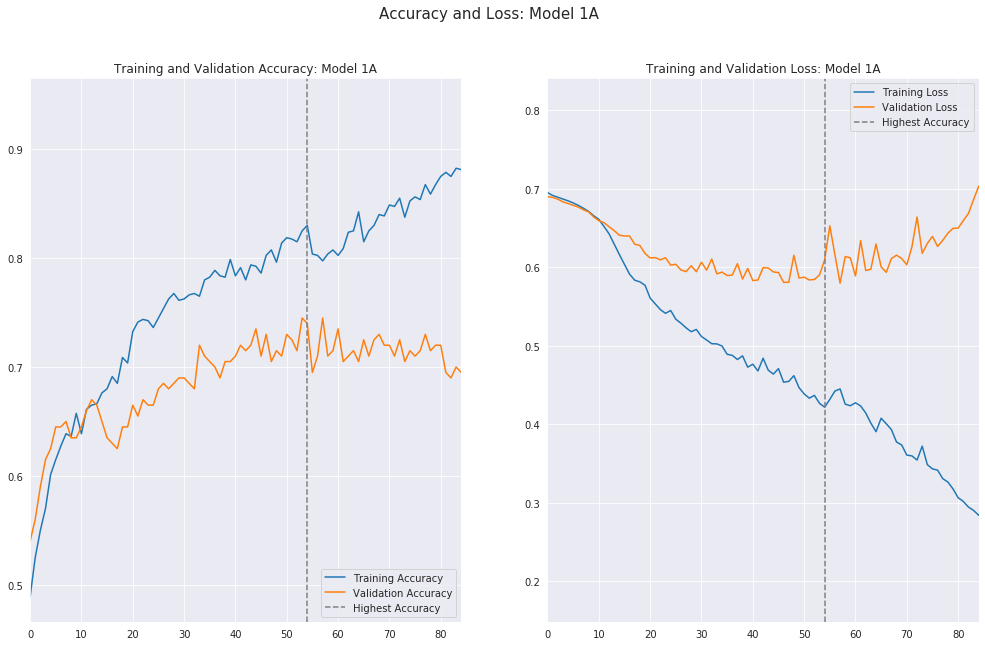

In [0]:
# Learning curves
acc_1A = history_1A.history['accuracy']
val_acc_1A = history_1A.history['val_accuracy']

loss_1A = history_1A.history['loss']
val_loss_1A = history_1A.history['val_loss']

epochs_range = range(104)

plt.figure(figsize=(17, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1A, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1A, label='Validation Accuracy')
plt.axvline(x=54, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 84)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy: Model 1A')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1A, label='Training Loss')
plt.plot(epochs_range, val_loss_1A, label='Validation Loss')
plt.axvline(x=54, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 84)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss: Model 1A')

plt.suptitle('Accuracy and Loss: Model 1A', fontsize='15')

plt.show()

In [0]:
# Predictions
y_pred_1A = model_1A.predict_classes(X_test_1)

In [0]:
#Validation accuracy score
accuracy_1A = accuracy_score(y_test_1, y_pred_1A) 
accuracy_1A

0.745

##### **Classification Report:**
 - The classification report do show signs that total accuracy, F1 score, precision, and recall can be improved. Although the algorithm was correct on predicting class 1, or thumbs up, 80% of the time, it detected it only 68% of the time. 
 - However, as loss shows significant increases over epochs, it is a clear sign that the model may not generalize well. As training progressed the validation loss showed that the model became more uncertain of the predictions that were being made.

In [0]:
print('Classification Report: Model 1A \n', metrics.classification_report(y_test_1, y_pred_1A))

Classification Report: Model 1A 
               precision    recall  f1-score   support

           0       0.70      0.81      0.75        96
           1       0.80      0.68      0.74       104

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



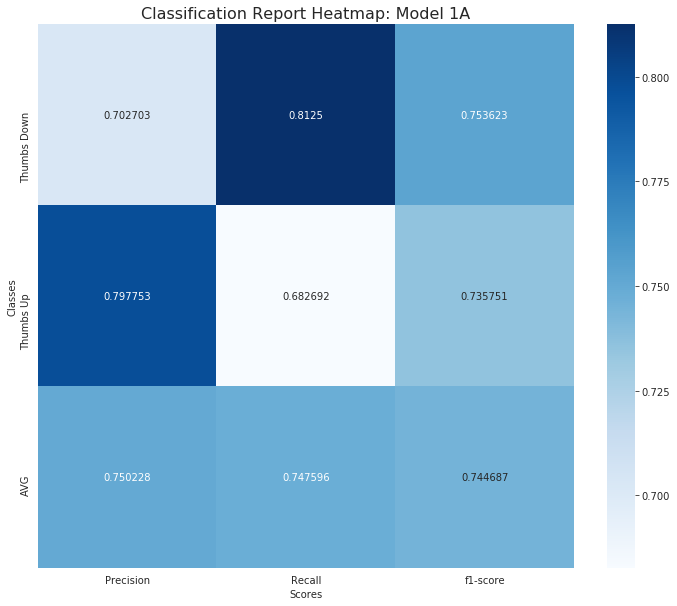

In [0]:
# Classification report heatmap
plot_classification_report(y_test_1, y_pred_1A, (12,10))
plt.ylabel('Classes')
plt.xlabel('Scores')
plt.title('Classification Report Heatmap: Model 1A', fontsize='16')
plt.show();

##### **Confusion Matrix:**
 - Confusion matrix shows that 78 reviews were correctly classified as a thumbs down, or the negative class. 18 were wrongly classified as a thumbs up (false positives). 33 were wrongly classified as a thumbs down, or false negatives, and 71 were correctly classified as a thumbs up, or true positives.


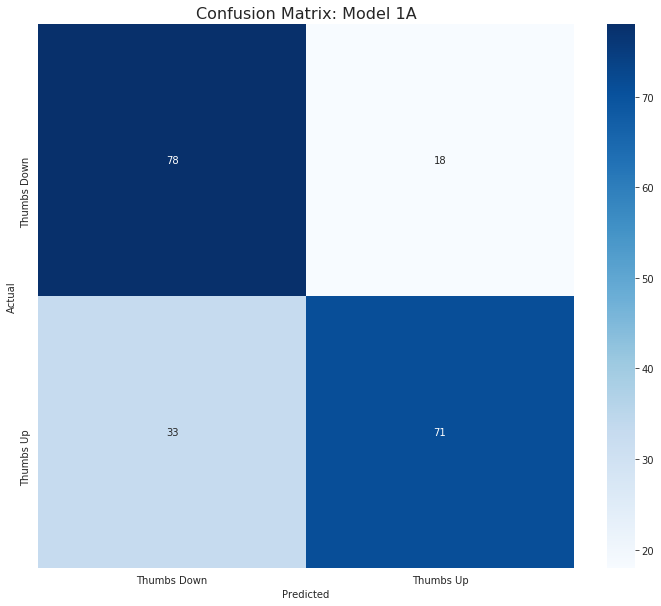

In [0]:
# Confusion matrix
conf_mx1 = confusion_matrix(y_test_1, y_pred_1A)
plt.figure(figsize=(12,10))
plot_confusion_matrix(conf_mx1, True, None , 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Model 1A', fontsize='16')
plt.show();

In [0]:
t = time.time()
export_path_model_1A = "./tmp/saved_models_1A.h5/{}".format(int(t))
model_1A.save(export_path_model_1A, save_format='tf')

export_path_model_1A

INFO:tensorflow:Assets written to: ./tmp/saved_models_1A.h5/1573917627/assets


'./tmp/saved_models_1A.h5/1573917627'

### **Model 1B:**
 - One bidirectional RNN layer using a GRU cell with 128 nodes was used.
 - Tanh activation and sigmoid recurrent activation was used for the RNN layer.
 - Adam optimization was utilized with a learning rate of 0.0001, and a sigmoid activation function was used for the output layer with sparse categorical cross entropy as a cost function.
 - Batch size of 128 was used with early stopping set to 50 epochs where the highest accuracy was restored and used for comparison. Model was set to train over 200 epochs. 

#### **Training and Validation**

In [0]:
# Create the model
tf.keras.backend.clear_session()
model_1B = tf.keras.Sequential()
model_1B.add(layers.Bidirectional(layers.RNN(layers.GRUCell(128, activation='tanh', recurrent_activation='sigmoid')),
             input_shape=(40,50)))
model_1B.add(layers.Dense(2, activation='softmax'))

In [0]:
# Model summary
model_1B.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               138240    
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 138,754
Trainable params: 138,754
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model_1B.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [0]:
#Fit model with execution time recorded
start = timer()
start = timer()
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50, restore_best_weights=True)
mc = ModelCheckpoint('best_model_1B.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_1B = model_1B.fit(X_train_1, y_train_1,
          validation_data=(X_test_1, y_test_1),
          batch_size=128,
          epochs=200,
          callbacks=[es, mc, tbCallBack]
)
end = timer()
exec_time_model_1b = (end - start)

print('Total Processing Time in Seconds:', exec_time_model_1b)

Train on 800 samples, validate on 200 samples
Epoch 1/200
768/800 [===========================>..] - ETA: 0s - loss: 0.7821 - accuracy: 0.4987
Epoch 00001: val_accuracy improved from -inf to 0.52000, saving model to best_model_1B.h5
800/800 [==============================] - 3s 4ms/sample - loss: 0.7832 - accuracy: 0.4950 - val_loss: 0.7140 - val_accuracy: 0.5200
Epoch 2/200
768/800 [===========================>..] - ETA: 0s - loss: 0.7101 - accuracy: 0.5052
Epoch 00002: val_accuracy did not improve from 0.52000
800/800 [==============================] - 1s 894us/sample - loss: 0.7092 - accuracy: 0.5075 - val_loss: 0.6921 - val_accuracy: 0.5100
Epoch 3/200
768/800 [===========================>..] - ETA: 0s - loss: 0.6946 - accuracy: 0.5156
Epoch 00003: val_accuracy did not improve from 0.52000
800/800 [==============================] - 1s 834us/sample - loss: 0.6963 - accuracy: 0.5088 - val_loss: 0.7020 - val_accuracy: 0.5100
Epoch 4/200
768/800 [===========================>..] - ETA: 

In [0]:
# Reload model checkpoint
saved_model_1B = tf.keras.models.load_model('best_model_1B.h5')

**Metrics and Visualizations:**

In [0]:
# Model evaluation restored at highest accuracy
stats_train_1B = model_1B.evaluate(X_train_1, y_train_1)
stats_val_1B = model_1B.evaluate(X_test_1, y_test_1)
print(stats_train_1B)
print(stats_val_1B)

800/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

**Learning Curves:**
 - Learning curves below show signs of less overfitting, though test loss still increases over time, test accuracy does not seem to drop after 20 epochs after the highest accuracy score was determined. 

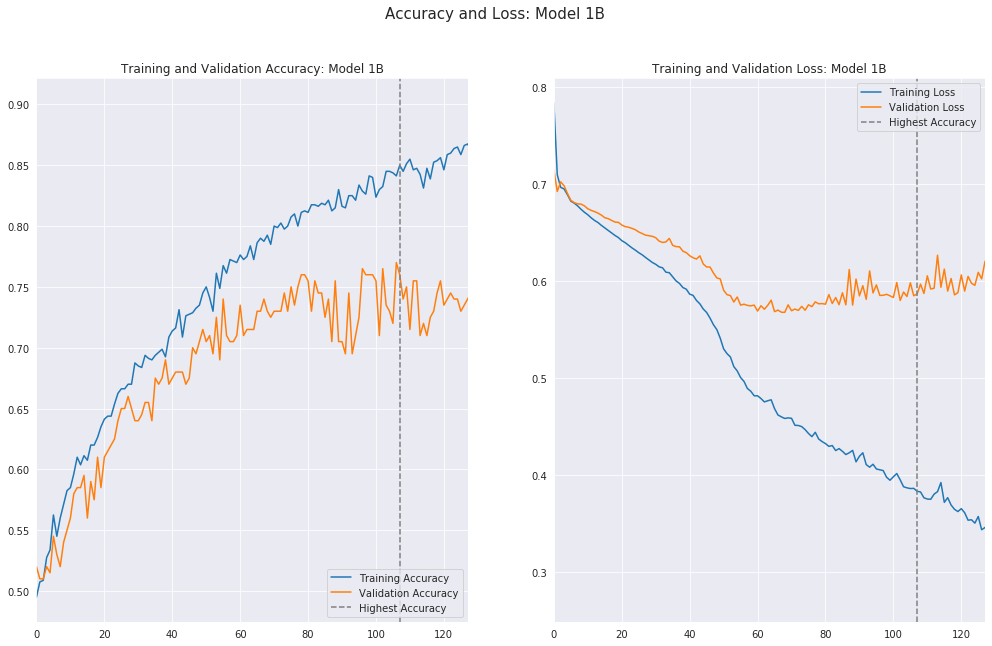

In [0]:
# Learning curves
acc_1B = history_1B.history['accuracy']
val_acc_1B = history_1B.history['val_accuracy']

loss_1B = history_1B.history['loss']
val_loss_1B = history_1B.history['val_loss']

epochs_range = range(157)

plt.figure(figsize=(17, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1B, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1B, label='Validation Accuracy')
plt.axvline(x=107, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 127)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy: Model 1B')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1B, label='Training Loss')
plt.plot(epochs_range, val_loss_1B, label='Validation Loss')
plt.axvline(x=107, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 127)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss: Model 1B')

plt.suptitle('Accuracy and Loss: Model 1B', fontsize='15')

plt.show()

In [0]:
# Predictions
y_pred_1B = model_1B.predict_classes(X_test_1)

In [0]:
#Validation accuracy score
accuracy_1B = accuracy_score(y_test_1, y_pred_1B) 
accuracy_1B

0.77

**Classification Report:**
 - The classification report also show signs that total accuracy, F1 score, precision, and recall can be improved. Although F1 scores shows improvement, precision an recall are around the mid 70's.   
 - Precision and recall within both classes are interestingly the same.

In [0]:
print('Classification Report: Model 1B \n', metrics.classification_report(y_test_1, y_pred_1B))

Classification Report: Model 1B 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        96
           1       0.78      0.78      0.78       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



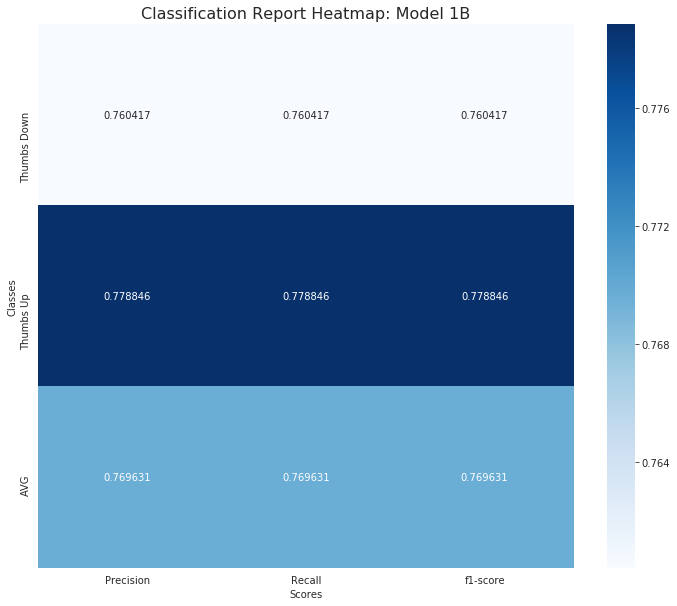

In [0]:
# Classification report heatmap
plot_classification_report(y_test_1, y_pred_1B, (12,10))
plt.ylabel('Classes')
plt.xlabel('Scores')
plt.title('Classification Report Heatmap: Model 1B', fontsize='16')
plt.show();

**Confusion Matrix:**
- Confusion matrix shows that 73 reviews were correctly classified as a thumbs down, or the negative class. 23 were wrongly classified as a thumbs up (false positives). 23 were wrongly classified as a thumbs down, or false negatives, and 81 were correctly classified as a thumbs up, or true positives.

- As precision and recall were the same within both classes, this is reflected in the confusion matrix as both false positives and negatives are the same. 



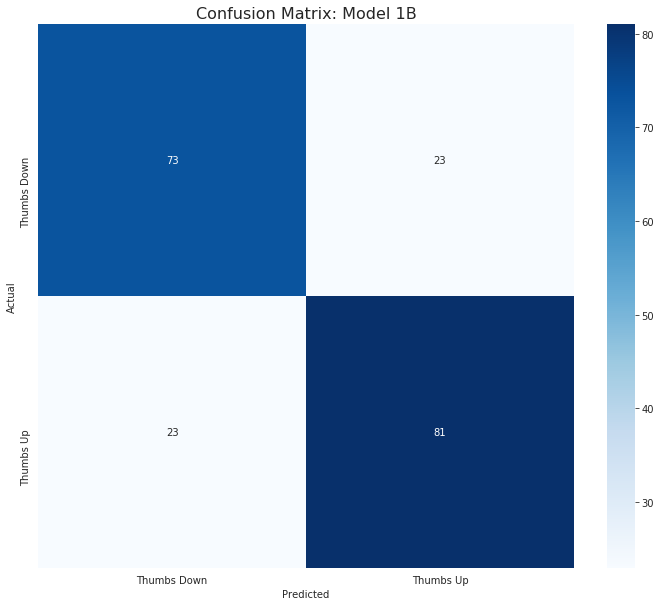

In [0]:
# Confusion matrix
conf_mx2 = confusion_matrix(y_test_1, y_pred_1B)
plt.figure(figsize=(12,10))
plot_confusion_matrix(conf_mx2, True, None , 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Model 1B', fontsize='16')
plt.show();

In [0]:
t = time.time()
export_path_model_1B = "./tmp/saved_models_1B.h5/{}".format(int(t))
model_1B.save(export_path_model_1B, save_format='tf')

export_path_model_1B

INFO:tensorflow:Assets written to: ./tmp/saved_models_1B.h5/1573917101/assets


'./tmp/saved_models_1B.h5/1573917101'

## **Experimental Factor 2:**
 - Experimental factor two used a preprocessed document collection that aside from stop words, omitted punctuations, and elements from html code, all words were used from the documents as word sequences. Since the length of text in the documents were not of the same size, documents were padded, which were embedded as zeros.  
 - A vocabulary of 100,000 pretrained word vectors were used with a dimension of 200.
 - Two bidirectional RNN layers were used along with the output layer in the second experimental factor. 
 - Two models were examined in the second experimental factor. 
 - With the RNN layers, two different types of cells were used: LSTM cells for the first model, and GRU cells for the second model.
 - The two models used different nodes for each layer. The first model used 256 nodes for the first layer, and 64 nodes for the second layer. The second model used 256 nodes for the first layer and 128 nodes for the second layer. 
 - To further address a possible vanishing/exploding gradients problem, batch normalization and regularization using dropout was used for both models. The first layer of both models used a 50% dropout and batch normalization. The second layer of both models used a 25% dropout and batch normalization as well.
 - RNN layers from both models used tanh activation, and recurrent activation used sigmoid activation.
 - Adam optimization was utilized with a learning rate of 0.0001, and a sigmoid activation function was used for the output layer with sparse categorical cross entropy as a cost function.
 - Early stopping was used for both models that were set to restore the highest accuracy. Models were ran over 200 epochs where early stopping was set to stop after 50 epochs. A batch size of 128 was used. Model training used random shuffling.
 - Results showed that both models performed the same with regards to accuracy, as both had a validation accuracy score of 83%.
 - The first model using LSTM took around 495 seconds while the second model using GRU took about 620 seconds until early stopping. 
 - Validation loss for the first and second models were about 0.60595 and 0.74207, respectively.

### **Model 2A:**
 - Two bidirectional RNN layers using LSTM cells with 256 nodes for the first layer and 64 nodes for the second.
 - Batch normalization and regularization using dropout was used. A dropout of 50% was used for the first layer, and 25% for the second layer.
 - Random shuffling was used in training.
 - Tanh activation and sigmoid recurrent activation is used for the RNN layers.
 - Adam optimization was utilized with a learning rate of 0.0001, and a sigmoid activation function was used for the output layer with sparse categorical cross entropy as a cost function.
 - Batch size of 128 was used with early stopping set to 50 epochs where the highest accuracy is restored and used for comparison. Model was set to train over 200 epochs. 


#### **Training and Validation**

In [0]:
# Create the model
tf.keras.backend.clear_session()
model_2A = tf.keras.Sequential()
model_2A.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True), input_shape=(1052, 200)))
model_2A.add(layers.BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, moving_variance_initializer='ones'))
model_2A.add(Dropout(0.50))
model_2A.add(layers.Bidirectional(layers.LSTM(64)))
model_2A.add(layers.BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, moving_variance_initializer='ones'))
model_2A.add(Dropout(0.25))
model_2A.add(layers.Dense(2, activation='sigmoid'))

In [0]:
# Model summary
model_2A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1052, 512)         935936    
_________________________________________________________________
dropout (Dropout)            (None, 1052, 512)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1052, 512)         2048      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               295424    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense (Dense)                (None, 2)                 2

In [0]:
# Compile the model
model_2A.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [0]:
#Fit model with execution time recorded
start = timer()
start = timer()
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50, restore_best_weights=True)
mc = ModelCheckpoint('best_model_2A.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_2A = model_2A.fit(X_train_2, y_train_2,
          validation_data=(X_test_2, y_test_2),
          batch_size=128,
          shuffle=True,
          epochs=200,
          callbacks=[es, mc, tbCallBack]
)
end = timer()
exec_time_model_2a = (end - start)

print('Total Processing Time in Seconds:', exec_time_model_2a)

Train on 800 samples, validate on 200 samples
Epoch 1/200
768/800 [===========================>..] - ETA: 0s - loss: 0.7831 - accuracy: 0.5208
Epoch 00001: val_accuracy improved from -inf to 0.47000, saving model to best_model_2A.h5
800/800 [==============================] - 17s 22ms/sample - loss: 0.7838 - accuracy: 0.5163 - val_loss: 0.7636 - val_accuracy: 0.4700
Epoch 2/200
768/800 [===========================>..] - ETA: 0s - loss: 0.7745 - accuracy: 0.5221
Epoch 00002: val_accuracy improved from 0.47000 to 0.54000, saving model to best_model_2A.h5
800/800 [==============================] - 4s 5ms/sample - loss: 0.7758 - accuracy: 0.5163 - val_loss: 0.7092 - val_accuracy: 0.5400
Epoch 3/200
768/800 [===========================>..] - ETA: 0s - loss: 0.8245 - accuracy: 0.5078
Epoch 00003: val_accuracy did not improve from 0.54000
800/800 [==============================] - 4s 5ms/sample - loss: 0.8264 - accuracy: 0.5025 - val_loss: 0.7061 - val_accuracy: 0.5300
Epoch 4/200
768/800 [===

In [0]:
# Reload model checkpoint
saved_model_2A = tf.keras.models.load_model('best_model_2A.h5')

**Metrics and Visualizations:**

In [0]:
# Model evaluation restored from highest accuracy
stats_train_2A = model_2A.evaluate(X_train_2, y_train_2)
stats_val_2A = model_2A.evaluate(X_test_2, y_test_2)
print(stats_train_2A)
print(stats_val_2A)

800/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

**Learning Curves:**
 - Learning curves below high variation over epochs for both validation loss and accuracy. It is questionable if the model would fit well to new data. However, validation accuracy after the 40th epoch remained close to the 80th percentile. As with the models in the first experimental factor, loss shows a widening gap between training and validation over epochs. Validation loss is also highly variable indicating the models uncertainty in its predictions. It seems evident that lack of data is the main reason. Training over 800 documents and validating on 200, clearly is not enough.

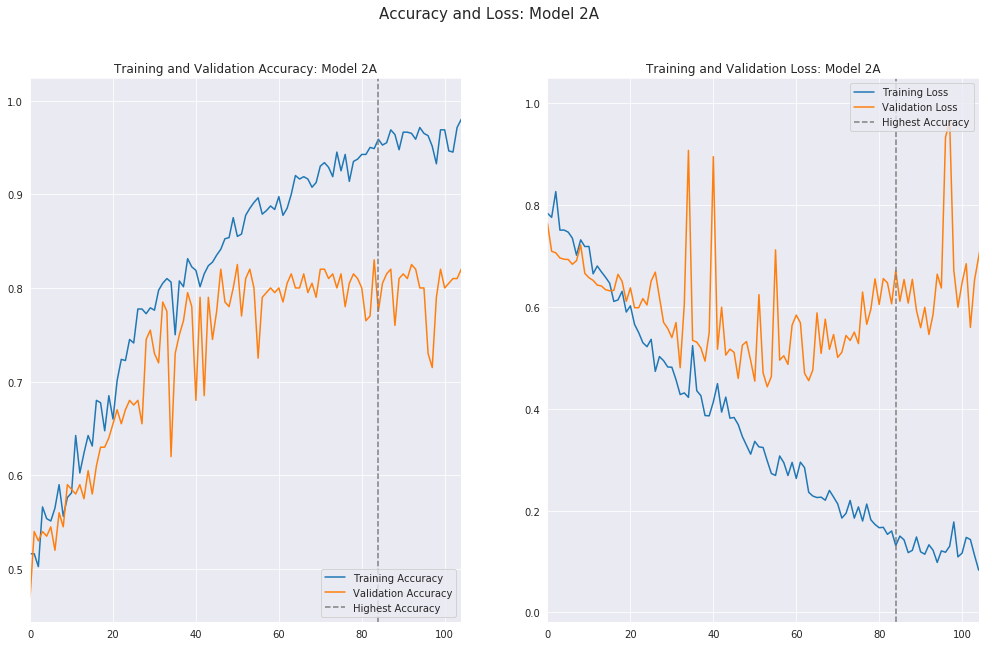

In [0]:
# Learning curves
acc_2A = history_2A.history['accuracy']
val_acc_2A = history_2A.history['val_accuracy']

loss_2A = history_2A.history['loss']
val_loss_2A = history_2A.history['val_loss']

epochs_range = range(134)

plt.figure(figsize=(17, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2A, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2A, label='Validation Accuracy')
plt.axvline(x=84, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 104)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy: Model 2A')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2A, label='Training Loss')
plt.plot(epochs_range, val_loss_2A, label='Validation Loss')
plt.axvline(x=84, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 104)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss: Model 2A')

plt.suptitle('Accuracy and Loss: Model 2A', fontsize='15')

plt.show()

In [0]:
# Predictions
y_pred_2A = model_2A.predict_classes(X_test_2)

In [0]:
#Validation accuracy score
accuracy_2A = accuracy_score(y_test_2, y_pred_2A) 
accuracy_2A

0.83

**Classification Report:**
 - The classification report show signs that total accuracy, F1 score, precision, and recall have improved from the models in experimental factor 1. F1 scores are higher showing a better tradeoff between precision and recall. However, precision and recall show an imbalance between classes. 
 - This may be the result of the high variability in validation loss, as the more the model progressed, the loss curves show uncertainty in predictions.

In [0]:
print('Classification Report: Model 2A \n', metrics.classification_report(y_test_2, y_pred_2A))

Classification Report: Model 2A 
               precision    recall  f1-score   support

           0       0.91      0.72      0.80        96
           1       0.78      0.93      0.85       104

    accuracy                           0.83       200
   macro avg       0.85      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



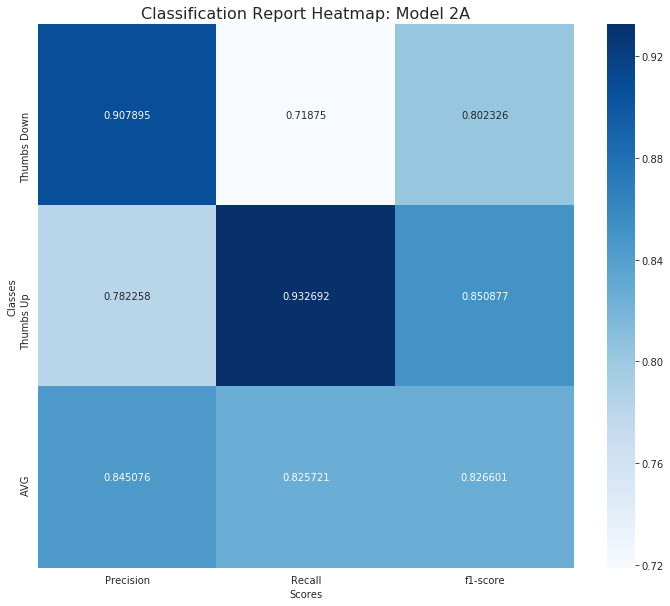

In [0]:
# Classification report heatmap
plot_classification_report(y_test_2, y_pred_2A, (12,10))
plt.ylabel('Classes')
plt.xlabel('Scores')
plt.title('Classification Report Heatmap: Model 2A', fontsize='16')
plt.show();

**Confusion Matrix:**
- Confusion matrix shows that 69 reviews were correctly classified as a thumbs down, or the negative class. 27 were wrongly classified as a thumbs up (false positives). 7 were wrongly classified as a thumbs down, or false negatives, and 97 were correctly classified as a thumbs up, or true positives.

- As precision and recall showed a significant imbalance between classes, it seems that it is also reflected in the confusion matrix, as false positives and negatives were significantly different. In addition, having more false positives than negatives may not be ideal, especially for predicting movie reviews.

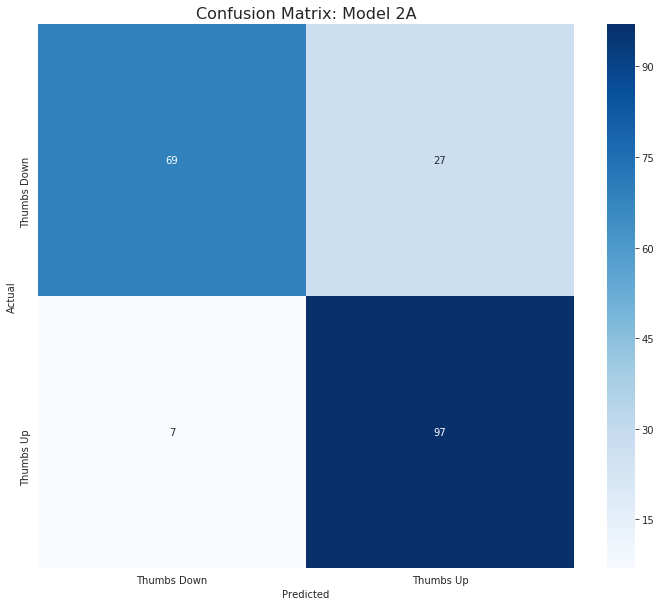

In [0]:
conf_mx3 = confusion_matrix(y_test_2, y_pred_2A)
plt.figure(figsize=(12,10))
plot_confusion_matrix(conf_mx3, True, None , 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Model 2A', fontsize='16')
plt.show();

In [0]:
t = time.time()
export_path_model_2A = "./tmp/saved_models_2A.h5/{}".format(int(t))
model_2A.save(export_path_model_2A, save_format='tf')

export_path_model_2A

INFO:tensorflow:Assets written to: ./tmp/saved_models_2A.h5/1573989285/assets


'./tmp/saved_models_2A.h5/1573989285'

### **Model 2B:**
 - Two bidirectional RNN layers using GRU cells with 256 nodes for the first layer and 128 nodes for the second.
 - Batch normalization and regularization using dropout was used. A dropout of 50% was used for the first layer, and 25% for the second layer.
 - Random shuffling was used in training.
 - Tanh activation and sigmoid recurrent activation is used for the RNN layers.
 - Adam optimization was utilized with a learning rate of 0.0001, and a sigmoid activation function was used for the output layer with sparse categorical cross entropy as a cost function.
 - Batch size of 128 was used with early stopping set to 50 epochs where the highest accuracy is restored and used for comparison. Model was set to train over 200 epochs. 

#### **Training and Validation**

In [0]:
# Create the model
tf.keras.backend.clear_session()
model_2B = tf.keras.Sequential()
model_2B.add(layers.Bidirectional(layers.GRU(256, return_sequences=True), input_shape=(1052, 200)))
model_2B.add(layers.BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, moving_variance_initializer='ones'))
model_2B.add(Dropout(0.50))
model_2B.add(layers.Bidirectional(layers.GRU(128)))
model_2B.add(layers.BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, moving_variance_initializer='ones'))
model_2B.add(Dropout(0.25))
model_2B.add(layers.Dense(2, activation='sigmoid'))

In [0]:
# Model summary
model_2B.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1052, 512)         703488    
_________________________________________________________________
dropout (Dropout)            (None, 1052, 512)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1052, 512)         2048      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               493056    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense (Dense)                (None, 2)                 5

In [0]:
# Compile model
model_2B.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [0]:
#Fit model with execution time recorded
start = timer()
start = timer()
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50, restore_best_weights=True)
mc = ModelCheckpoint('best_model_2B.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_2B = model_2B.fit(X_train_2, y_train_2,
          validation_data=(X_test_2, y_test_2),
          batch_size=128,
          shuffle=True,
          epochs=200,
          callbacks=[es, mc, tbCallBack]
)
end = timer()
exec_time_model_2b = (end - start)

print('Total Processing Time in Seconds:', exec_time_model_2b)

Train on 800 samples, validate on 200 samples
Epoch 1/200
768/800 [===========================>..] - ETA: 0s - loss: 0.8398 - accuracy: 0.4870
Epoch 00001: val_accuracy improved from -inf to 0.52000, saving model to best_model_2B.h5
800/800 [==============================] - 9s 11ms/sample - loss: 0.8394 - accuracy: 0.4812 - val_loss: 0.7106 - val_accuracy: 0.5200
Epoch 2/200
768/800 [===========================>..] - ETA: 0s - loss: 0.7708 - accuracy: 0.5312
Epoch 00002: val_accuracy improved from 0.52000 to 0.57000, saving model to best_model_2B.h5
800/800 [==============================] - 4s 4ms/sample - loss: 0.7749 - accuracy: 0.5275 - val_loss: 0.6977 - val_accuracy: 0.5700
Epoch 3/200
768/800 [===========================>..] - ETA: 0s - loss: 0.7658 - accuracy: 0.5039
Epoch 00003: val_accuracy did not improve from 0.57000
800/800 [==============================] - 3s 4ms/sample - loss: 0.7664 - accuracy: 0.5038 - val_loss: 0.6913 - val_accuracy: 0.5700
Epoch 4/200
768/800 [====

In [0]:
# Reload model checkpoint
saved_model_2B = tf.keras.models.load_model('best_model_2B.h5')

**Metrics and Visualizations:**

In [0]:
#Evaluate model restored at highest accuracy
stats_train_2B = model_2B.evaluate(X_train_2, y_train_2)
stats_val_2B = model_2B.evaluate(X_test_2, y_test_2)
print(stats_train_2B)
print(stats_val_2B)

800/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

**Learning Curves:**
 - Learning curves also show high variability in addition to a wider gap between training and validation accuracy over epochs. Including the wide gap between training and validation loss, this is a clear sign that the model may overfit on new data. However, after the 90th epoch, validation accuracy remains close to the 80th percentile. Again, it seems evident that lack of data is the main reason. Training over 800 documents and validating on 200, clearly is not enough.  

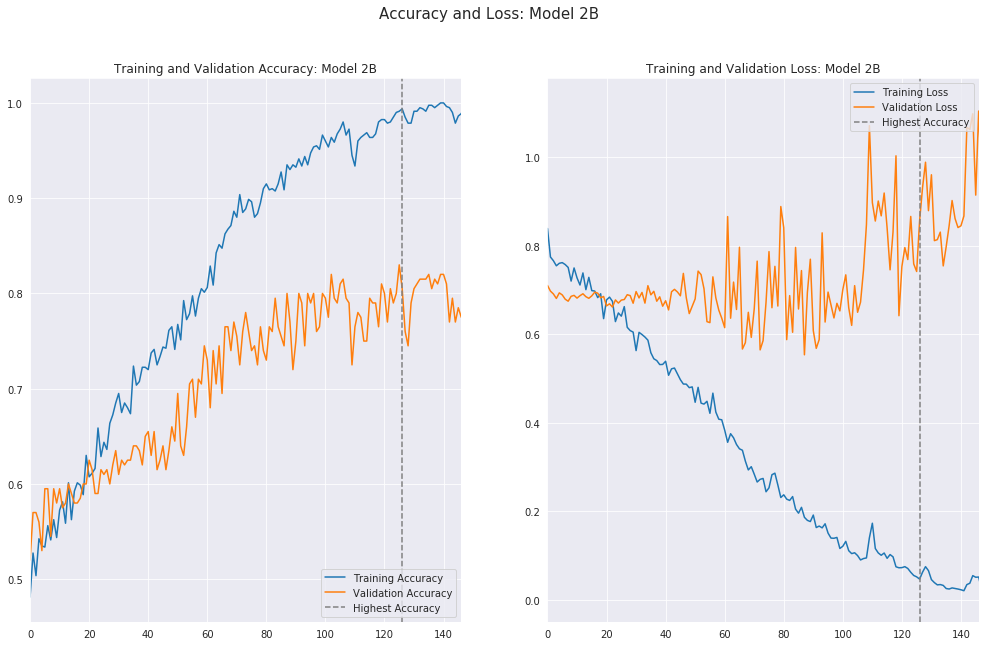

In [0]:
# Learning curves
acc_2B = history_2B.history['accuracy']
val_acc_2B = history_2B.history['val_accuracy']

loss_2B = history_2B.history['loss']
val_loss_2B = history_2B.history['val_loss']

epochs_range = range(176)

plt.figure(figsize=(17, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2B, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2B, label='Validation Accuracy')
plt.axvline(x=126, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 146)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy: Model 2B')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2B, label='Training Loss')
plt.plot(epochs_range, val_loss_2B, label='Validation Loss')
plt.axvline(x=126, color='gray', label='Highest Accuracy', linestyle='--')
plt.xlim(0, 146)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss: Model 2B')

plt.suptitle('Accuracy and Loss: Model 2B', fontsize='15')

plt.show()

In [0]:
y_pred_2B = model_2B.predict_classes(X_test_2)

In [0]:
#Validation accuracy score
accuracy_2B = accuracy_score(y_test_2, y_pred_2B) 
accuracy_2B

0.83

 **Classification Report:**
 - As with model 1B using a GRU cell, the result is the same here. Precision and recall are strangely the same within classes.

In [0]:
print('Classification Report: Model 2B \n', metrics.classification_report(y_test_2, y_pred_2B))

Classification Report: Model 2B 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        96
           1       0.84      0.84      0.84       104

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



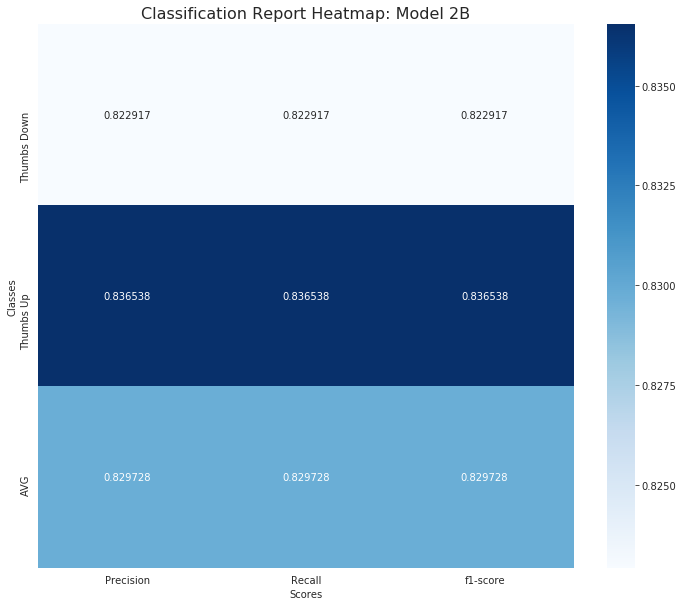

In [0]:
# Classification report heatmap
plot_classification_report(y_test_2, y_pred_2B, (12,10))
plt.ylabel('Classes')
plt.xlabel('Scores')
plt.title('Classification Report Heatmap: Model 2B', fontsize='16')
plt.show();

**Confusion Matrix:**
- Confusion matrix shows that 79 reviews were correctly classified as a thumbs down, or the negative class. 27 were wrongly classified as a thumbs up (false positives). 17 were wrongly classified as a thumbs down, or false negatives, and 87 were correctly classified as a thumbs up, or true positives.

- As precision and recall were the same within both classes, this is reflected in the confusion matrix as both false positives and negatives are the same. 


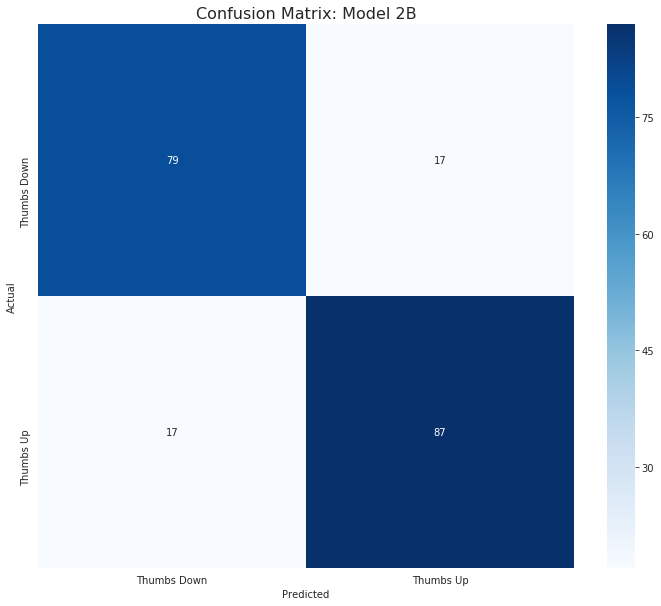

In [0]:
conf_mx4 = confusion_matrix(y_test_2, y_pred_2B)
plt.figure(figsize=(12,10))
plot_confusion_matrix(conf_mx4, True, None , 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Model 2B', fontsize='16')
plt.show();

In [0]:
t = time.time()
export_path_model_2B = "./tmp/saved_models_2B.h5/{}".format(int(t))
model_1B.save(export_path_model_2B, save_format='tf')

export_path_model_2B

INFO:tensorflow:Assets written to: ./tmp/saved_models_1B.h5/1573917101/assets


'./tmp/saved_models_1B.h5/1573917101'

## **Comparison of Models:**

**Accuracy Comparison of Models:**
 - Accuracy scores over epochs show that models 2A and 2B of experimental factor 2 were significantly better than the models in experimental factor 1.
 - This is likely due to the application of batch normalization and regularization through using dropouts.
 - However, both models show high variation in validation accuracy over epochs, although they rise higher than the other two models. This may be due to the changes in data preparation, where larger word sequences may be the reason for the variation. It could also be the use of two bidirectional layers instead of one, where backpropagation caused more bouncing around yet produced a better globally optimal solution. In addition, the training data was set to train through random shuffling which may also be a likely reason as well.     
 - On the other hand, it is clear that the higher accuracy scores produced by both models indicates that using more layers with regularization helps in achieving a better accuracy score, even with a collection of samples that is relatively small. 
 - It also seems evident that using a document collection with more word sequences makes a significant impact on training.   


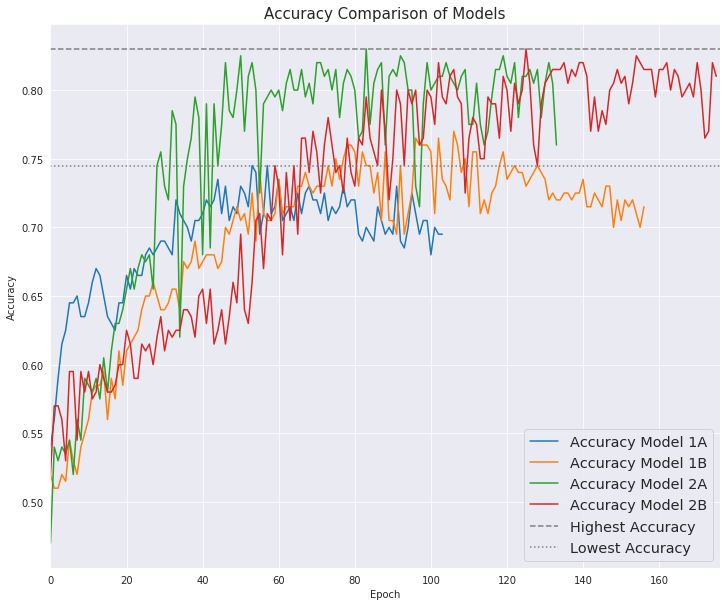

In [0]:
#Plot validation accuracy for all models
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(val_acc_1A, label='Accuracy Model 1A')
ax.plot(val_acc_1B, label='Accuracy Model 1B')
ax.plot(val_acc_2A, label='Accuracy Model 2A')
ax.plot(val_acc_2B, label='Accuracy Model 2B')
plt.axhline(y=0.83, color='gray', label='Highest Accuracy', linestyle='--')
plt.axhline(y=0.745, color='gray', label='Lowest Accuracy', linestyle=':')
plt.grid(which='minor')
plt.xlim(0, 176)
plt.xticks(np.arange(0, 176, step=20))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
legend = ax.legend(loc='best', fontsize='x-large' )
plt.title('Accuracy Comparison of Models', fontsize='15')
plt.show();

**Loss Comparison of Models:** 
 - The model with the lowest validation loss was the second model in the first experimental factor.
 - Although, both models in experimental factor 2 had high variations in validation loss, they had the lowest loss over all epochs, with model 2A having a loss of around 0.44, and model 2B having a loss of around 0.55.
 - It is also important to note that all models had a high loss, which not only indicates prediction uncertainty, and model 1B having the lowest loss trivial, yet also shows that the high loss was likely due to a lack of training and validation samples. 

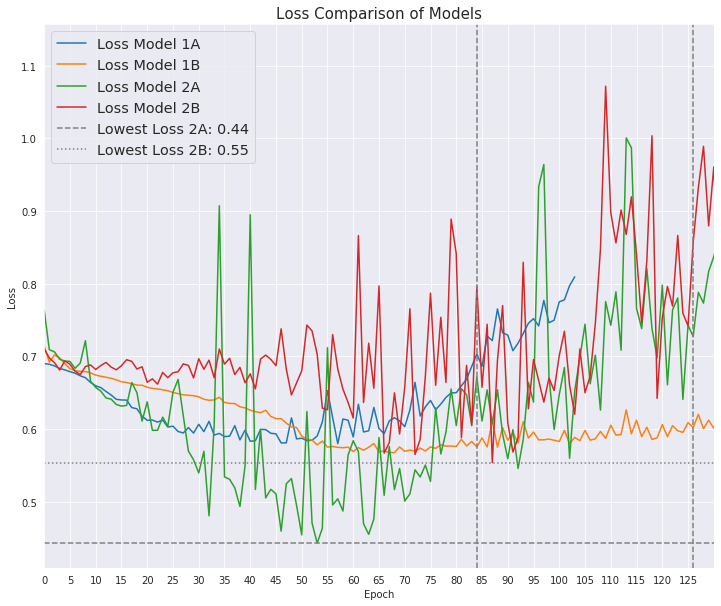

In [0]:
#Plot validation loss for all models
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(val_loss_1A, label='Loss Model 1A')
ax.plot(val_loss_1B, label='Loss Model 1B')
ax.plot(val_loss_2A, label='Loss Model 2A')
ax.plot(val_loss_2B, label='Loss Model 2B')
plt.axhline(y=0.4430, color='gray', label='Lowest Loss 2A: 0.44', linestyle='--')
plt.axhline(y=0.5538, color='gray', label='Lowest Loss 2B: 0.55', linestyle=':')
plt.axvline(x=84, color='gray', linestyle='--')
plt.axvline(x=126, color='gray', linestyle='--')
plt.grid(which='minor')
plt.xlim(0, 130)
plt.xticks(np.arange(0, 130, step=5))
#plt.ylim(0.4, 1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
legend = ax.legend(loc='best', fontsize='x-large' )
plt.title('Loss Comparison of Models', fontsize='15')
plt.show();

**RNN Benchmark Experiment Results:**
 - An overview of the processing times, training accuracy, test accuracy, and average loss indicate that the best choices would most likely be between the models from the second experimental factor. 
 - One factor to consider is that while the both models in the second experimental factor performed the best, the processing time showed about a 166% difference between the first model of the first experimental factor, which had the shortest time, and the second model of the second experimental factor that had the longest time of all the models. Taking the mean time between both models of both experimental factors shows that the difference is about 147%. Yet the difference in mean accuracy is around 7.25% higher, which can make a strong impact, especially when it comes down to language modeling. Additionally, validation losses did not show much of a difference aside from the second model in the second experimental factor. This makes a significant difference if accuracy is of utmost importance as the trade-off between this performance metric and overall performance cannot be ignored. This must be taken into careful consideration.
 - It is also worth noting that the first model in the second experimental factor did not have a difference in accuracy from the second model, and was around 22.40% faster. Although LSTM uses three different gates and GRU is supposed to be computationally more efficient, as it only uses two, it is interesting that LSTM performed faster in converging to an optimal solution.  On the other hand, more nodes were used in the second model using GRU, which may be the reason. In addition, the difference in loss is significant as the first model using LSTM cells had a loss that was around 20.20% lower than the second model using GRU cells. This topic may need to be further explored in a different experiment. Furthermore, another interesting point is that the first and second models in the first experimental factor used the same amount of nodes, yet the GRU cell used in the second model took longer to converge to a global optimum than the first model using an LSTM cell. The second model had around a 64.5% difference in processing time from the first model, though it did show significantly better accuracy, as it was 2.5% higher.          
 - It is clear however, that the models in the second experimental factor performed significantly better due to different reasons. First, aside from stop words, punctuations, and html code elements that were dropped from the document collection, utilizing all the words from each document seemed to have made an impact. Secondly, batch normalization and regularization through dropout also helped the models train better in addition to random shuffling. Finally, more layers and nodes were used thus creating more robust models.    


In [0]:
#Table for benchmark comparison
comparison_df = pd.DataFrame(np.array([['Model 1A', '1', '128', 'LSTM', round((exec_time_model_1a), 2), round(stats_train_1A[1], 5), round(stats_val_1A[1], 5),
                                        round(stats_train_1A[0], 5), round(stats_val_1A[0], 5)], ['Model 1B', '1', '128', 'GRU', round(exec_time_model_1b, 2), 
                                        round(stats_train_1B[1], 5), round(stats_val_1B[1], 5), round(stats_train_1B[0], 5), round(stats_val_1B[0], 5)],
                                       ['Model 2A', '2', '256, 64','LSTM', round(exec_time_model_2a, 2), round(stats_train_2A[1], 5), round(stats_val_2A[1], 5), 
                                        round(stats_train_2A[0], 5), round(stats_val_2A[0], 5)], ['Model 2B', '2', '256, 128', 'GRU', round(exec_time_model_2b, 2), 
                                        round(stats_train_2B[1], 5), round(stats_val_2B[1], 5), round(stats_train_2B[0], 5), round(stats_val_2B[0], 5)]]),
                                        columns=('Model', 'Total RNN Layers', 'Nodes per Layer', 'RNN Cell', 'Processing Time in Seconds', 
                                                'Training Set Accuracy', 'Test Set Accuracy', 'Training Loss', 'Test Set Loss'))
comparison_df

,Model,Total RNN Layers,Nodes per Layer,RNN Cell,Processing Time in Seconds,Training Set Accuracy,Test Set Accuracy,Training Loss,Test Set Loss
0,Model 1A,1,128,LSTM,57.16,0.82625,0.745,0.41975,0.59035
1,Model 1B,1,128,GRU,111.62,0.85125,0.77,0.38085,0.58461
2,Model 2A,2,"256, 64",LSTM,495.01,0.9675,0.83,0.0971,0.60595
3,Model 2B,2,"256, 128",GRU,619.58,0.98875,0.83,0.03109,0.74207


**Benchmark Processing Time Comparison by Model:**

  - By examining the plot of processing times by model, processing times from the second experimental factor are much higher than the first with an average of about 147%. 
  - As detailed in the above, although performance times are something that needs to be taken into careful consideration, other factors must also be weighed in, especially with neural networks, which require detailed attention to the preprocessing of data, topology, and hyperparameter settings.


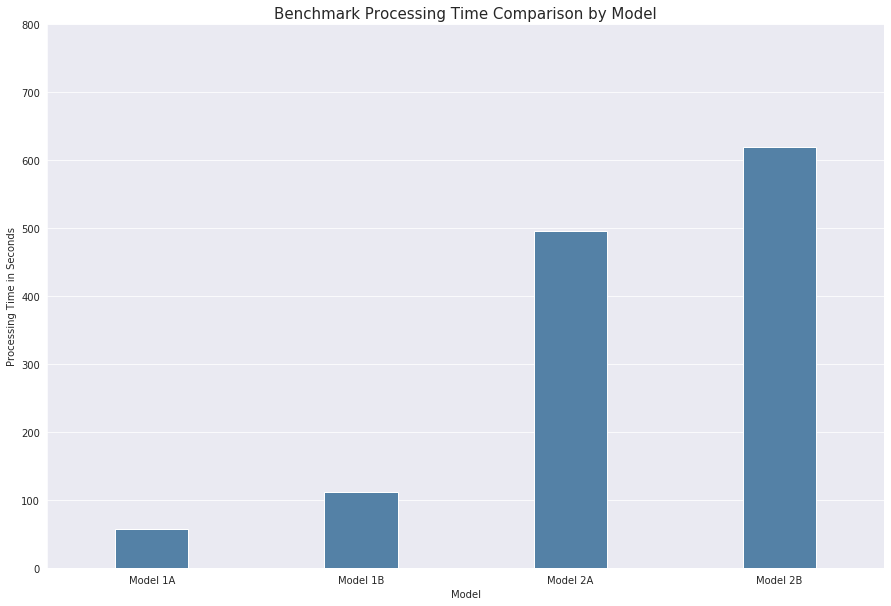

In [0]:
#Plot of model processing times:
comparison_df['Processing Time in Seconds'] = comparison_df['Processing Time in Seconds'].astype(float) 
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot('Model', 'Processing Time in Seconds', data = comparison_df, color='steelblue')

def change_width(ax, new_value) : #Change width of bars
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

plt.ylim(0, 800)
plt.title('Benchmark Processing Time Comparison by Model', fontsize='15')
plt.show();

### **Conclusion:**
*  In this experiment, a document collection on movie reviews was used in complement with pretrained word vectors from Twitter. Data from the document collection contained over 200,000 words. Pretrained word vectors represented 1,193,515 words. 
* Multiple recurrent neural networks were built and tested to classify negative and positive reviews in the dataset. Train and test set accuracies and losses were captured, as well as processing times for training each model. The number of layers and nodes per layer served as key parameters that differentiated each model, and the accuracies, loss, and processing times were be compared. Validation accuracy was the main metric used to compare models. 
* The document collection was a part of 2 folders, one for positive reviews and the other for negative. Each folder contained 500 reviews.
* Pretrained word embeddings were applied to the document collection where words were replaced with a vector of numbers.
* Training and test sets were created based off an 80/20 split. Word vectors for negative and positive reviews were randomly shuffled.
* For each document/word vector in the test set, a negative or positive review was predicted. Prediction classes were 0 for negative, and 1 for positive.
*  Language models were developed using recurrent neural network layers to predict the outcome of each review.
*   The goal of this benchmark experiment was to assess the effectiveness of recurrent neural networks using different topologies. 
*   Benchmark experiment was based on a 2x2 factorial design with two levels on each of two experimental factors. 
- Accuracy scores over epochs showed that models 2A and 2B of experimental factor 2 were significantly better than the models in experimental factor 1.
- This was likely due to the application of batch normalization and regularization through using dropouts.
- However, both models showed high variation in validation accuracy over epochs, although accuracy scores rose higher than the other two models. This may have been due to the changes made in data preparation, where larger word sequences could have been the reason for the variation. It could also have been the use of two bidirectional layers instead of one, where backpropagation caused more bouncing around, yet produced a better globally optimal solution. In addition, the training data was set to train through random shuffling which may also have been a likely reason as well.     
- On the other hand, it is clear that the higher accuracy scores produced by both models indicates that using more layers with regularization helps in achieving a better accuracy score, even with a collection of samples that is relatively small. 
- It also seems evident that using a document collection with more word sequences makes a significant impact on training.
- The model with the lowest validation loss was the second model in the first experimental factor.
- Although, both models in experimental factor 2 had high variations in validation loss, they had the lowest loss over all epochs, with model 2A having a loss of around 0.44, and model 2B having a loss of around 0.55.
- It is also important to note that all models had a high loss, which not only indicates prediction uncertainty, and model 1B having the lowest loss trivial, yet also shows that the high loss was likely due to a lack of training and validation samples.  
- An overview of the processing times, training accuracy, test accuracy, and average loss indicate that the best choices would most likely be between the models from the second experimental factor. 
- One factor to consider is that while the both models in the second experimental factor performed the best, the processing time showed about a 166% difference between the first model of the first experimental factor, which had the shortest time, and the second model of the second experimental factor that had the longest time of all the models. Taking the mean time between both models of both experimental factors shows that the difference is about 147%. Yet the difference in mean accuracy is around 7.25% higher, which can make a strong impact, especially when it comes down to language modeling. Additionally, validation losses did not show much of a difference aside from the second model in the second experimental factor. This makes a significant difference if accuracy is of utmost importance as the trade-off between this performance metric and overall performance cannot be ignored. Though performance times are something that needs to be taken into careful consideration, other factors must also be weighed in, especially with neural networks, which require detailed attention to the preprocessing of data, topology, and hyperparameter settings.  
- It is also worth noting that the first model in the second experimental factor did not have a difference in accuracy from the second model, and was around 22.40% faster. Although LSTM uses three different gates and GRU is supposed to be computationally more efficient, as it only uses two, it is interesting that LSTM performed faster in converging to an optimal solution.  On the other hand, more nodes were used in the second model using GRU, which may be the reason. In addition, the difference in loss is significant as the first model using LSTM cells had a loss that was around 20.20% lower than the second model using GRU cells. This topic may need to be further explored in a different experiment. Furthermore, another interesting point is that the first and second models in the first experimental factor used the same amount of nodes, yet the GRU cell used in the second model took longer to converge to a global optimum than the first model using an LSTM cell. The second model had around a 64.5% difference in processing time from the first model, though it did show significantly better accuracy, as it was 2.5% higher.          
- It is clear however, that the models in the second experimental factor performed significantly better due to different reasons. First, aside from stop words, punctuations, and html code elements that were dropped from the document collection, utilizing all the words from each document seemed to have made an impact. Secondly, batch normalization and regularization through dropout also helped the models train better in addition to random shuffling. Finally, more layers and nodes were used thus creating more robust models.
- In the case of using a language model to classify written customer reviews, calls, and complaint logs, it is critical that the utmost accuracy is maintained, and that enough data is collected. Based on the results of this experiment, a model similar to the models in the second experimental factor is recommended. That is, a deep RNN bidirectional model with multiple layers using either LSTM or GRU cells that are highly regularized, and enough textual content that have large enough word sequences to derive meaning from to make accurate predictions. While it is a model that takes longer to train requiring more time and resources, for projects that require achieving the highest possible accuracy, it would be in our benefit to employ such endeavors. Such a model would produce a significant reduction in overhead costs, as messages and calls can be directed to the right customer service personnel. In this experiment, bidirectional RNN layers were used to model different recurrent neural networks. Adam optimization was utilized with a learning rate of 0.0001, where tanh activation and sigmoid reactivation functions were used for the RNN layers, and a sigmoid activation function was used for the output layer using sparse categorical cross entropy as a cost function. Other hyperparameter settings included a dropout rate that was either set to 0.25 or 0.50, epochs were set to 200, batch sizes were set at 128. Early stopping was also used with a stopping parameter based on validation accuracy, stopping at 50 epochs after the highest accuracy was determined. It is recommended that more data is collected, and that these hyperparameter settings are used until further experiments are conducted where other topologies, hyperparameter settings, and methods can be explored. 


### References:
[1] Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O’Reilly.

[2] https://www.tensorflow.org/guide/keras/rnn